<a href="https://colab.research.google.com/github/eIi0/TD_INFO3/blob/main/td4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TD4 IA** - Le perceptron, fonctions logiques et le problème du XOR

# Modèle du perceptron avec une fonction d'activation Heaviside

In [ ]:
import numpy as np

def unit_step(v):
    """ 
    Heavyside Step function. v must be a scalar 
    """
    if v >= 0:
        return 1
    else:
        return 0

def perceptron(x, w, b):
    """ 
    Function implemented by a perceptron with weight vector w and bias b 
    y = f(w*x + b)
    """
    v = np.dot(w, x) + b
    y = unit_step(v)
    return y

# NON logique (NOT)

w = 1, b = -0.5

In [ ]:
def NOT_percep(x):
    return perceptron(x, w=-1, b=0.5)

Test du perceptron implémentant un OR

In [ ]:
print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

NOT(0) = 1
NOT(1) = 0


# ET logique (AND)
w1 = 1, w2 = 1, b = -1.5

In [ ]:
def AND_percep(x):
    # weights: w1 = 1, w2 = 1
    w = np.array([1, 1])
    # biais
    b = -1.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


# OU logique (OR)
w1 = 1, w2 = 1, b = -0.5

In [ ]:
def OR_percep(x):
    # weights: w1 = 1, w2 = 1
    w = np.array([1, 1])
    # biais
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


Est-il **possible de trouver des paramètres pour un simple perceptron (w1, w2 et b)** de tel sorte qu'il **resolve le problème du OU Exclusif (XOR)** ?<br>
Inutile de chercher, la réponse est non, **ces paramètres n'existent pas** !<br>
La raison est que le **problème du XOR n'est pas linérairement séparable**.

La solution consiste à **combiner de multiples séparateurs linéaires** en introduisant des **unités dites "cachées"** dans les réseaux : un **perceptron multi-couches** !<br>
Mais le **nombre de paramètres augmente** et la **recherche des bonnes valeurs** de paramètres devient **compliquée**...<br>
Or, vous savez à présent entrainer des réseaux pour leur faire apprendre des fonctions...<br>
La **solution** consiste donc **entrainer un perceptron multi-couches** pour lui faire **apprendre la fonction XOR** !

# OU Exclusif logique (XOR) : une combinaison de fonctions logiques de base
- Avant cela, on peut aussi vérifier que la fonction OU EXCLUSIF entre 2 entrées x1 et x2 peut se réaliser à partir des fonctions logiques de bases. 
- On peut en effet écrire : `XOR(x1, x2) = AND(NOT(AND(x1,x2)), OR(x1,x2))`

In [ ]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_percep(new_x)
    return output

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


# Apprentissage de la fonction logique XOR par un réseau de neurone

#### Import des librairies

In [ ]:
import tensorflow as tf
import datetime
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

#### Données d'entrainement

In [ ]:
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])

## <font color="red">**Exo1**</font>: Construction d'un perceptron multi-couches pour l'apprentissage de la fonction XOR
- Construire un modèle de perceptron multi-couches avec 1 couche cachée de 8 neurones
- Vous utiliserez une fonction d'activation `tanh` pour les neurones de la couche cachée et une fonction d'activation `sigmoid`pour les neurones de la couche de sortie

In [ ]:
model = Sequential()
model.add(Dense(8,input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


#### Hyperparamètres

In [ ]:
learning_rate = 0.1
batch_size = 1
nb_epoch = 1000

#### Compilation du modèle
- on utilise l'algorithme de Stochastic Gradient Descent (`SGD`) comme optimizer
- il s'agit d'un problème de classification binaire, on utilise donc une loss de type `binary_crossentropy`

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',
              optimizer=sgd, 
              metrics=['accuracy'])

On sauvegarde les poids du modèle avant entrainement. On pourra ainsi les recharger plus loin pour recommencer un apprentissage de 0

In [ ]:
model.save_weights('model.h5')

## <font color="red">**Exo2**</font>: Entrainement du modèle
- Entrainer votre modèle pour 1000 epochs

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = nb_epoch, 
                    batch_size = batch_size, 
                    verbose = 1, 
                    validation_split=learning_rate) 

Epoch 1/1000
3/3 [==============================] - 1s 94ms/step - loss: 1.0403 - accuracy: 0.0000e+00 - val_loss: 0.3673 - val_accuracy: 1.0000
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9169 - accuracy: 0.0000e+00 - val_loss: 0.5017 - val_accuracy: 1.0000
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.8312 - accuracy: 0.3333 - val_loss: 0.6353 - val_accuracy: 1.0000
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.7705 - accuracy: 0.3333 - val_loss: 0.7660 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7233 - accuracy: 0.3333 - val_loss: 0.9076 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.6667 - val_loss: 1.0308 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6560 - accuracy: 0.6667 - val_loss: 1.1378 - val_accuracy: 

On peut afficher les poids du réseau après apprentissage

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-0.02414059, -0.6982511 ,  1.1955386 , -0.9235327 ,  0.55749965,
        -1.7816465 ,  1.9244899 , -0.43320388],
       [ 0.7051465 , -1.1111811 ,  1.1202064 , -0.44502303,  0.5302685 ,
        -1.5870136 ,  1.6207877 , -1.264425  ]], dtype=float32), array([-0.10689875,  0.36062014, -0.49672776,  0.2513637 , -0.1574249 ,
        0.7956129 , -0.8444481 ,  0.45641685], dtype=float32)]
[array([[ 0.34610826],
       [-1.2632344 ],
       [ 1.6612003 ],
       [-1.1528394 ],
       [ 0.64319414],
       [-2.80831   ],
       [ 3.0133655 ],
       [-1.2796652 ]], dtype=float32), array([-0.00030422], dtype=float32)]


#### Evaluation : vérifions que le réseau a bien appris une fonction logique XOR !

In [ ]:
print(model.predict(x_train))
print(model.predict(x_train).round())   # On fait un arrondi pour avoir des valeurs entières 0 ou 1

1/1 [==============================] - 0s 137ms/step
[[0.00223832]
 [0.99911094]
 [0.9988553 ]
 [0.99998534]]
1/1 [==============================] - 0s 22ms/step
[[0.]
 [1.]
 [1.]
 [1.]]


#### Affichons enfin la courbe de la loss et de l'accuracy en fonction du nombre d'epoch

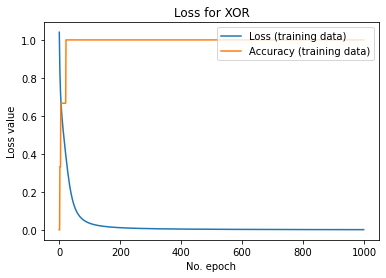

In [ ]:
# Plot history of the loss and Accuracy
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.title('Loss for XOR')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

## <font color="red">**Exo3**</font>: Early Stopping de l'apprentissage (arrêt prématuré)
- La figure ci-dessus montre que la loss n'évolue plus beaucoup après environ 500 epoch
- On pourrait donc pu arrêter l'entrainement avant la fin (i.e. les 1000 epochs)...
- Keras a prévu ce type de situation et permet de définir une callback `EarlyStopping` dont la documentation se trouve [ici](https://keras.io/api/callbacks/early_stopping/).
- Etudier les paramètres passés à la callback `EarlyStopping` ci-dessous. 
- Sous quelle condition l'apprentissage va-t-il s'arrêter prématurément ?
- Réentrainer votre modèle avec le code ci-dessous et observer le nombre d'epoch lors de l'arrêt de l'apprentissage

In [ ]:
# Avant de relancer un entrainement, on restaure les poids aléatoires initiaux (avant entrainement)
model.load_weights('model.h5')   

In [18]:
# Definition d'une callback pour éventuellement arrêter l'entrainement avant le nombre d'epoch 
# Ici, on monitore la loss (i.e. l'erreur). Si la loss n'évolue pas de 0.0001 pendant 3 epochs, on s'arrete 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=1, mode="min", 
                                            baseline=None, restore_best_weights=True)
    
history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, callbacks=[callback], verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8710 - accuracy: 0.2500
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8249 - accuracy: 0.2500
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.2500
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7778 - accuracy: 0.2500
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.2500
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7610 - accuracy: 0.2500
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.2500
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7551 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.2500
Epoch 11/1000
4/4 [

In [19]:
print(model.predict(x_train))
print(model.predict(x_train).round())

1/1 [==============================] - 0s 22ms/step
[[0.00472091]
 [0.9866938 ]
 [0.9893819 ]
 [0.01530035]]
1/1 [==============================] - 0s 21ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


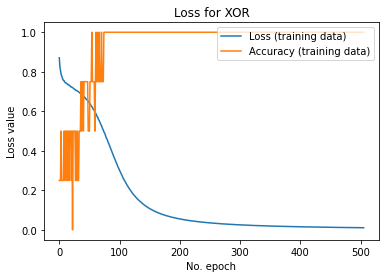

In [20]:
# Plot history of the loss and Accuracy
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.title('Loss for XOR')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

## <font color="red">**Exo4**</font>: 
- Construisez cette fois-ci un réseau de neurones avec 2 couches cachées de 8 neurones chacune
- Vous utiliserez toujours une fonction d'activation `tanh` pour les neurones des couches cachées et une fonction d'activation `sigmoid`pour les neurones de la couche de sortie
- Est-ce que le réseau apprend plus vite ?

Vos réponses:
Non, le réseau de neurone apprend aussi vite, la seule différence, est qu'il s'arrête au lieu de continuer inutilement

#### MLP avec 2 couches cachées

In [21]:
model2 = Sequential()
model2.add(Dense(8,input_shape=(2,), activation='tanh'))
model2.add(Dense(8,input_shape=(2,), activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


#### Compilation du modèle

In [23]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # on utilise l'algorithme de Stochastic Gradient Descent (SGD)
model2.compile(loss='binary_crossentropy',    # il s'agit d'un problème de classification binaire
               optimizer=sgd, 
               metrics=['accuracy'])

In [24]:
model2.save_weights('model2.h5')

In [25]:
# Definition d'une callback pour éventuellement arrêter l'entrainement avant le nombre d'epoch 
# Ici, on monitore la loss (i.e. l'erreur). Si la loss n'évolue pas de 0.0001 pendant 3 epochs, on s'arrete 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=1, mode="min", 
                                            baseline=None, restore_best_weights=True)
    
history2 = model2.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, callbacks=[callback], verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7668 - accuracy: 0.2500
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.2500
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7474 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7439 - accuracy: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7414 - accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7263 - accuracy: 0.2500
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7296 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.5000
Epoch 11/10

#### Evaluation

In [26]:
print(model2.predict(x_train))
print(model2.predict(x_train).round())

1/1 [==============================] - 0s 57ms/step
[[0.00142153]
 [0.9902516 ]
 [0.98933095]
 [0.01342736]]
1/1 [==============================] - 0s 22ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


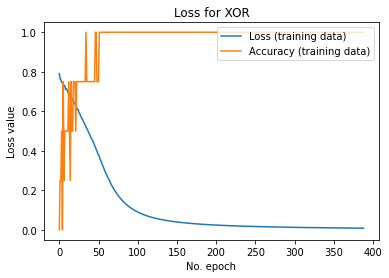

In [27]:
# Plot history of the loss and Accuracy
plt.plot(history2.history['loss'], label='Loss (training data)')
plt.plot(history2.history['accuracy'], label='Accuracy (training data)')
plt.title('Loss for XOR')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

## <font color="red">**Exo5**</font>: Si vous avez le temps... 
- Entrainer votre modèle de MLP après avoir changer les hyperparamètres: dimensions du réseau, learning rate, optimizer, fonction d'activation... 

In [105]:
model3 = Sequential()
model3.add(Dense(8,input_shape=(2,), activation='tanh'))
model3.add(Dense(8, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

In [106]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 8)                 24        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [107]:
learn = 0.35

sgd = tf.keras.optimizers.SGD(learning_rate=learn)  # on utilise l'algorithme de Stochastic Gradient Descent (SGD)
model3.compile(loss='binary_crossentropy',    # il s'agit d'un problème de classification binaire
               optimizer=sgd, 
               metrics=['accuracy'])

model3.save_weights('model3.h5')

In [108]:
# Definition d'une callback pour éventuellement arrêter l'entrainement avant le nombre d'epoch 
# Ici, on monitore la loss (i.e. l'erreur). Si la loss n'évolue pas de 0.0001 pendant 3 epochs, on s'arrete 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.00001, patience=3, verbose=1, mode="min", 
                                            baseline=None, restore_best_weights=True)
    
history3 = model3.fit(x_train, y_train, epochs=2400, batch_size=batch_size, callbacks=[callback], verbose=1)

Epoch 1/2400
4/4 [==============================] - 1s 3ms/step - loss: 0.8514 - accuracy: 0.2500
Epoch 2/2400
4/4 [==============================] - 0s 6ms/step - loss: 0.8131 - accuracy: 0.2500
Epoch 3/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.7912 - accuracy: 0.5000
Epoch 4/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.7826 - accuracy: 0.2500
Epoch 5/2400
4/4 [==============================] - 0s 3ms/step - loss: 0.7763 - accuracy: 0.2500
Epoch 6/2400
4/4 [==============================] - 0s 3ms/step - loss: 0.7612 - accuracy: 0.2500
Epoch 7/2400
4/4 [==============================] - 0s 3ms/step - loss: 0.7647 - accuracy: 0.5000
Epoch 8/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.7557 - accuracy: 0.5000
Epoch 9/2400
4/4 [==============================] - 0s 3ms/step - loss: 0.7550 - accuracy: 0.2500
Epoch 10/2400
4/4 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.5000
Epoch 11/2400
4/4 [

In [109]:
print(model3.predict(x_train))
print(model3.predict(x_train).round())

1/1 [==============================] - 0s 59ms/step
[[8.5726538e-04]
 [9.9821627e-01]
 [9.9856281e-01]
 [8.5195346e-04]]
1/1 [==============================] - 0s 24ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


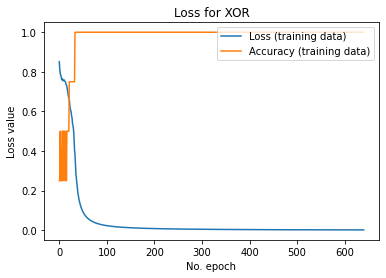

In [110]:
# Plot history of the loss and Accuracy
plt.plot(history3.history['loss'], label='Loss (training data)')
plt.plot(history3.history['accuracy'], label='Accuracy (training data)')
plt.title('Loss for XOR')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()